In [1]:
!nvidia-smi

Sun Jul 18 13:47:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2021-07-18 13:47:35--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: ‘pytorchcv.py’

pytorchcv.py        100%[===================>]   6.22K  --.-KB/s    in 0s      

2021-07-18 13:47:35 (64.8 MB/s) - ‘pytorchcv.py’ saved [6371/6371]



In [3]:
# torchinfo: https://github.com/TylerYep/torchinfo
#            (formerly torch-summary) provides information complementary to what is provided by print(your_model) in PyTorch
#            completely rewritten version of the original torchsummary and torchsummaryX projects
!pip install torchinfo

In [4]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary

from pytorchcv import load_mnist, train, plot_results
load_mnist(batch_size=128)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


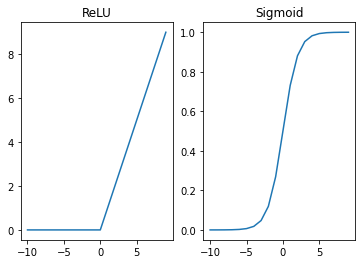

In [5]:
def plot_function(f, name=""):
    plt.plot(range(-10, 10), [f(torch.tensor(x, dtype=torch.float32)).item() for x in range(-10, 10)])
    plt.title(name)

plt.subplot(121)
plot_function(torch.relu, "ReLU")
plt.subplot(122)
plot_function(torch.sigmoid, "Sigmoid")

In [6]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 100),  # 784 inputs, 100 outputs
    nn.ReLU(),  # Activation Function
    nn.Linear(100, 10),  # 100 inputs, 10 outputs
    nn.LogSoftmax(dim=1))

print(next(net.parameters()).device)  # 'cpu': get device of net before calling summary

print(summary(net, input_size=(1, 28, 28)))  # Use device specified by torch.cuda.is_available if no device arguement is given

print(next(net.parameters()).device)  # 'cuda' if available, because of summary being called

cpu
Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─ReLU: 1-3                              [1, 100]                  --
├─Linear: 1-4                            [1, 10]                   1,010
├─LogSoftmax: 1-5                        [1, 10]                   --
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32
cuda:0


Epoch  0, Train acc=0.923, Val acc=0.948, Train loss=0.002, Val loss=0.001
Epoch  1, Train acc=0.963, Val acc=0.952, Train loss=0.001, Val loss=0.001
Epoch  2, Train acc=0.971, Val acc=0.949, Train loss=0.001, Val loss=0.002
Epoch  3, Train acc=0.974, Val acc=0.966, Train loss=0.001, Val loss=0.001
Epoch  4, Train acc=0.978, Val acc=0.959, Train loss=0.001, Val loss=0.001


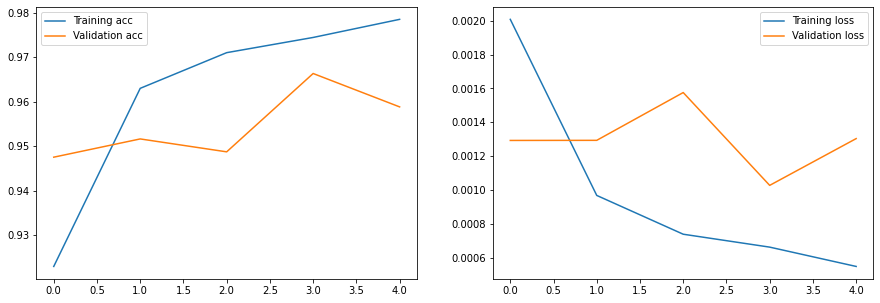

In [7]:
hist = train(net, train_loader, test_loader, epochs=5)  # in pytorchcv, the features&labels were .to(device='gpu') if available
plot_results(hist)

## PyTorch 中，nn 与 nn.functional 有什么区别？
(https://www.zhihu.com/question/66782101)

具有学习参数的（例如，conv2d, linear, batch_norm)采用nn.Xxx方式，没有学习参数的（例如，maxpool, loss func, activation func）等根据个人选择使用nn.functional.xxx或者nn.Xxx方式。但关于dropout，个人强烈推荐使用nn.Xxx方式，因为一般情况下只有训练阶段才进行dropout，在eval阶段都不会进行dropout。使用nn.Xxx方式定义dropout，在调用model.eval()之后，model中所有的dropout layer都关闭，但以nn.function.dropout方式定义dropout，在调用model.eval()之后并不能关闭dropout。

作者：有糖吃可好
链接：https://www.zhihu.com/question/66782101/answer/579393790
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

In [8]:
from torch.nn.functional import relu, log_softmax

class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(784, 100)
        self.out = nn.Linear(100, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = relu(x)
        x = self.out(x)
        x = log_softmax(x, dim=1)
        return x

net = MyNet()

summary(net, input_size=(1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
MyNet                                    --                        --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─Linear: 1-3                            [1, 10]                   1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Epoch  0, Train acc=0.921, Val acc=0.948, Train loss=0.002, Val loss=0.001
Epoch  1, Train acc=0.961, Val acc=0.956, Train loss=0.001, Val loss=0.001
Epoch  2, Train acc=0.970, Val acc=0.956, Train loss=0.001, Val loss=0.001
Epoch  3, Train acc=0.974, Val acc=0.959, Train loss=0.001, Val loss=0.001
Epoch  4, Train acc=0.977, Val acc=0.967, Train loss=0.001, Val loss=0.001


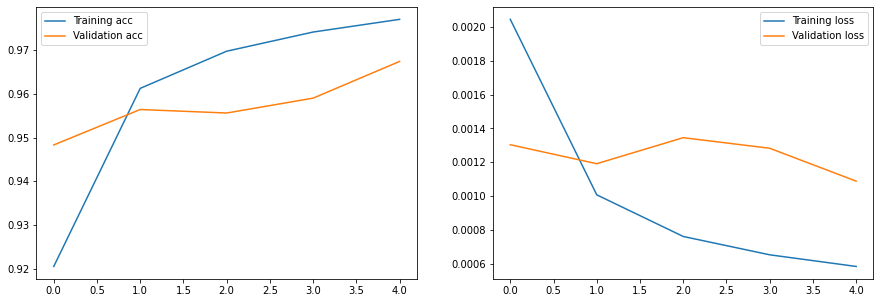

In [9]:
hist = train(net, train_loader, test_loader, epochs=5)
plot_results(hist)